## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preparation

Wine quality using Decision Tree classifier.

### Data loading
* Pre-processed wine csv

In [2]:
data = pd.read_csv('newWine.csv')

Data header.

In [3]:
data.head(3)

fixed-acidity  volatile-acidity  citric-acid  residual-sugar  chlorides  \
0      -0.244839         -1.364235     0.215108       -0.009242  -0.229692   
1      -0.475997         -0.726427    -0.266850       -0.114361  -0.400763   
2      -0.553050         -0.604940    -0.266850       -0.913271  -0.628858   

   free-sulfur-dioxide  total-sulfur-dioxide   density        pH  sulphates  \
0             0.308780             -0.136132 -0.265785  0.632903  -0.746462   
1             1.153496              1.137700  0.167373  0.508399   1.469762   
2            -0.254365             -0.578435 -1.805164  0.197139  -1.350887   

    alcohol  quality  type  
0 -0.245446      3.0   1.0  
1 -0.832184      3.0   1.0  
2  1.514770      3.0   1.0

The Input variables (based on physicochemical tests) are:
  
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
   Output variable (based on sensory data): 
   
   12 - quality (score between 0 and 10)

### Missing Data
Next we will check if there is any missing values

In [4]:
data.isnull().sum()

fixed-acidity           35
volatile-acidity        35
citric-acid             35
residual-sugar          35
chlorides               35
free-sulfur-dioxide     35
total-sulfur-dioxide    35
density                 35
pH                      35
sulphates               35
alcohol                 35
quality                  0
type                     0
dtype: int64

* **fixed acidity**,**volatile acidity**,**citric acid**,**residual sugar**,**chlorides**,**PH**,**sulphates** columns have missing values.
* The ratio of those missing values is low. Thus we will drop all the rows with missing values



In [5]:
data.dropna(inplace=True)

### Data visualizations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

1.0    15854
0.0     3851
Name: type, dtype: int64

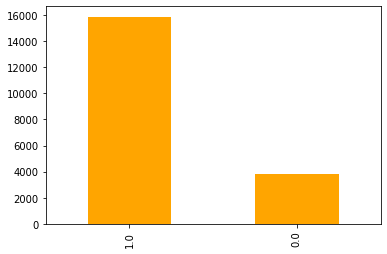

In [7]:
data['type'].value_counts().plot(kind='bar',color='orange')
data['type'].value_counts()

We have two wine types in the data set.

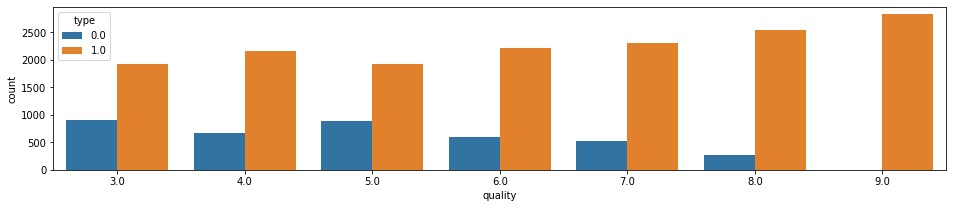

In [8]:
#plot target class distribution 
plt.figure(figsize=(16,3))
sns.countplot(data=data, x='quality',hue='type')

In [9]:
data.columns

Index(['fixed-acidity', 'volatile-acidity', 'citric-acid', 'residual-sugar',
       'chlorides', 'free-sulfur-dioxide', 'total-sulfur-dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [10]:
data['quality'].value_counts()

4.0    2820
8.0    2820
3.0    2820
9.0    2820
7.0    2818
5.0    2806
6.0    2801
Name: quality, dtype: int64

**Build 3 classes for quality to show spread:**

* Low Quality: 3, 4
* Normal: 5, 6, 7
* High Quality: 8, 9

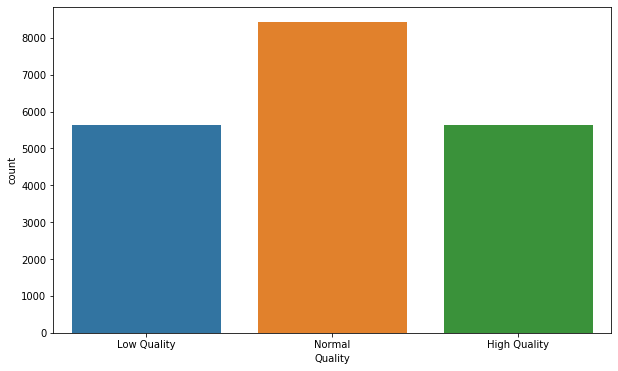

In [11]:
data.loc[data['quality']<=4, "Quality"]="Low Quality"
data.loc[(data['quality']>=5)&(data['quality']<=7), "Quality"]="Normal"
data.loc[data['quality']>=8, "Quality"]="High Quality"
fig = plt.figure(figsize = (10,6))
sns.countplot(data=data, x='Quality', order=['Low Quality','Normal','High Quality'])

* Normal Quality is the most frequent class.

### Correlation matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables

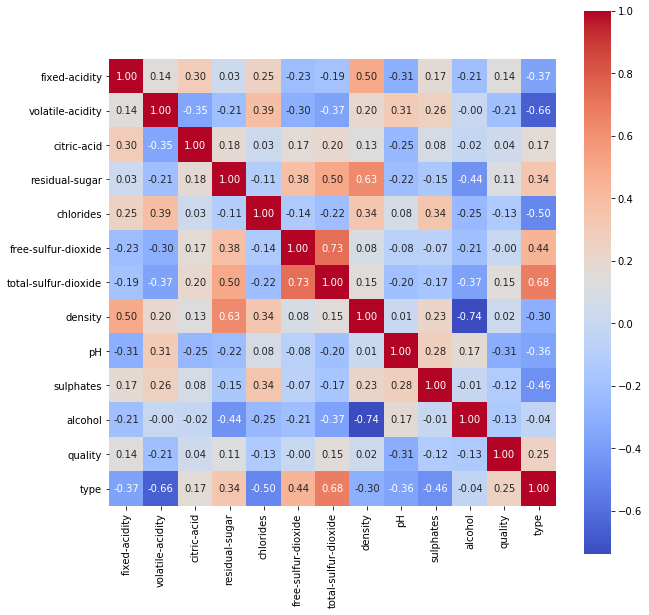

In [12]:
corr = data.corr(method = "pearson")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".2f")

* **type** is the most positive correlation with the target variable **quality** (it has 0.25 as correlation coefficient with the target variable **quality** ).
* **pH and volatile-acidity** has the highest negative correlation with the the wine quality (it has -0.31 and -0.21 as the correlation coefficient, respectively with **quality**), which may be the factors most determining wine quality.
* **free-sulfur-dioxide** has 0.00 correlation, and thus shows no linear relationship between the movement of the two variables.

We can visualize the relationships between pH, free-sulfur-dioxide and wine quality.

### Scatter matrix

In [13]:
features_mean= list(data.columns[:])
features_mean

['fixed-acidity',
 'volatile-acidity',
 'citric-acid',
 'residual-sugar',
 'chlorides',
 'free-sulfur-dioxide',
 'total-sulfur-dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type',
 'Quality']

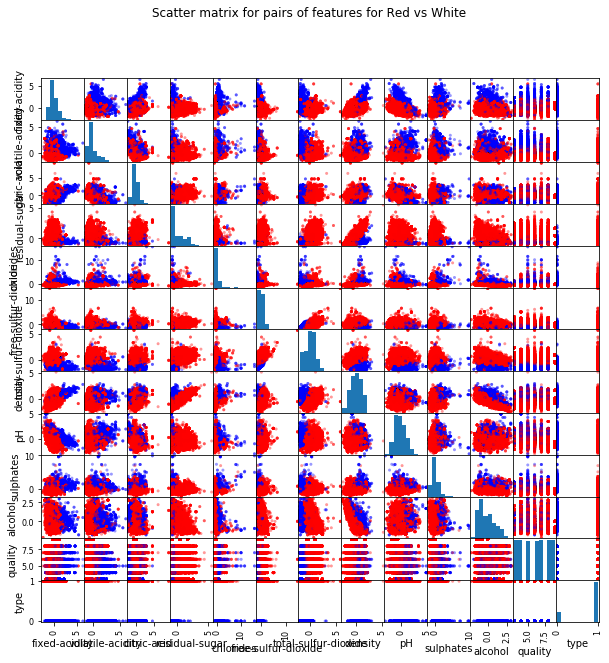

In [14]:
#Color Labels - 0 is red and 1 is white
color_dic = {0:'blue', 1:'red'} 
target_list = list(data['type'])
colors = list(map(lambda x: color_dic.get(x), target_list))
#Plotting the scatter matrix
sm = pd.plotting.scatter_matrix(data[features_mean], c= colors, alpha=0.4, figsize=((10,10)))
plt.suptitle("Scatter matrix for pairs of features for Red vs White ")
plt.show()

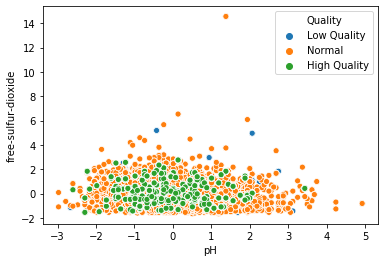

In [15]:
sns.scatterplot(data=data,x='pH',y='free-sulfur-dioxide',hue='Quality')

* The pH being lower seems to have an effect on the quality.

# Machine learning Model


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

### Data Split


In [17]:
data.columns

Index(['fixed-acidity', 'volatile-acidity', 'citric-acid', 'residual-sugar',
       'chlorides', 'free-sulfur-dioxide', 'total-sulfur-dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'Quality'],
      dtype='object')

In [18]:
data.head(5)

fixed-acidity  volatile-acidity  citric-acid  residual-sugar  chlorides  \
0      -0.244839         -1.364235     0.215108       -0.009242  -0.229692   
1      -0.475997         -0.726427    -0.266850       -0.114361  -0.400763   
2      -0.553050         -0.604940    -0.266850       -0.913271  -0.628858   
3       0.602741         -0.422710     0.077406       -0.892247  -0.172668   
4      -0.013681         -0.179735    -0.542254       -0.850199   0.026915   

   free-sulfur-dioxide  total-sulfur-dioxide   density        pH  sulphates  \
0             0.308780             -0.136132 -0.265785  0.632903  -0.746462   
1             1.153496              1.137700  0.167373  0.508399   1.469762   
2            -0.254365             -0.578435 -1.805164  0.197139  -1.350887   
3             0.590352             -0.224592 -1.558597 -1.359160  -0.544987   
4            -0.761194              0.023097 -0.632304 -0.363128  -1.216570   

    alcohol  quality  type      Quality  
0 -0.245446      3.0   1.0  Low Quality  
1 -0.832184      3.0   1.0  Low Quality  
2  1.514770      3.0   1.0  Low Quality  
3  1.598589      3.0   1.0  Low Quality  
4  0.006014      3.0   1.0  Low Quality

In [19]:
X = data.loc[:, ~data.columns.isin(['quality', 'Quality'])]
#If we want to do dimensionality reduction we can remove type as it does not have much effect on the overall predictive value
#X = data.loc[:, ~data.columns.isin(['quality', 'Quality', 'type'])]
y = data['quality']
Y = data['quality']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Data standardisation

In [21]:
data.describe()

fixed-acidity  volatile-acidity   citric-acid  residual-sugar  \
count   19705.000000      19705.000000  19705.000000    19705.000000   
mean        0.029354         -0.110858     -0.024660        0.050599   
std         0.919256          0.950393      0.919253        1.007588   
min        -2.556421         -1.576837     -2.194680       -1.018391   
25%        -0.553050         -0.726427     -0.473403       -0.787127   
50%        -0.167786         -0.361966     -0.060297       -0.492792   
75%         0.448636          0.184726      0.421661        0.705572   
max         6.381695          6.016108      9.234597        5.499029   

          chlorides  free-sulfur-dioxide  total-sulfur-dioxide       density  \
count  19705.000000         19705.000000          19705.000000  19705.000000   
mean      -0.079837             0.022828              0.081830      0.052416   
std        0.785409             0.979743              0.975621      1.009879   
min       -1.256119            -1.662225             -1.940727     -2.528205   
25%       -0.457787            -0.704880             -0.507666     -0.765583   
50%       -0.258204            -0.029107              0.058481      0.100733   
75%        0.055427             0.534037              0.943087      0.867091   
max       15.822491            14.556327              5.737650      5.198675   

                 pH     sulphates       alcohol       quality          type  
count  19705.000000  19705.000000  19705.000000  19705.000000  19705.000000  
mean      -0.096606     -0.129332     -0.144895      6.000609      0.804567  
std        1.022608      0.915782      1.004255      2.001623      0.396543  
min       -2.977711     -2.089628     -2.089480      3.000000      0.000000  
25%       -0.861144     -0.679304     -0.916004      4.000000      1.000000  
50%       -0.238625     -0.276354     -0.413085      6.000000      1.000000  
75%        0.570651      0.328071      0.508932      8.000000      1.000000  
max        4.928289      9.864552      3.107345      9.000000      1.000000

* Looking to the range of each feature, we can observe that the features have different scales. Thus we need to scale the features.
We will use StandardScaler for this purpose.

In [22]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scl = scaler.fit_transform(X_train)
#X_test_scl = scaler.transform(X_test)

* In general, decision tree works well without data scaling. Data scaling is necessary when we work with models sensitive to scale like neural networks.

### Decision Tree 

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [57]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [58]:
print('The accuracy on the test set using Decision Tree is is {}%'.format(accuracy_score(y_test,y_pred)*100))

The accuracy on the test set using Decision Tree is is 87.19301806373046%


### Train data

In [59]:
print('Accuracy Score on train data: \n')
print(classification_report(y_true=y_train, y_pred=clf.predict(X_train)))

Accuracy Score on train data: 

              precision    recall  f1-score   support

         3.0       0.98      1.00      0.99      2130
         4.0       0.96      0.97      0.96      2121
         5.0       0.94      0.94      0.94      2084
         6.0       0.97      0.91      0.94      2094
         7.0       0.95      0.94      0.95      2097
         8.0       0.96      0.99      0.97      2108
         9.0       1.00      1.00      1.00      2144

    accuracy                           0.97     14778
   macro avg       0.97      0.97      0.97     14778
weighted avg       0.97      0.97      0.97     14778



### Test data

In [60]:
from sklearn.metrics import confusion_matrix
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('\n')
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n')
print('Classification report on test data:\n')
print(classification_report(y_true=y_test, y_pred=y_pred))

Accuracy Score on test data:  0.8719301806373047


Confusion Matrix of test data:
 [[690   0   0   0   0   0   0]
 [  9 672   0   6   7   5   0]
 [  6  23 509  92  75  17   0]
 [  4  34 111 437  94  26   1]
 [  5   6  38  45 611  16   0]
 [  0  11   0   0   0 701   0]
 [  0   0   0   0   0   0 676]]


Classification report on test data:

              precision    recall  f1-score   support

         3.0       0.97      1.00      0.98       690
         4.0       0.90      0.96      0.93       699
         5.0       0.77      0.70      0.74       722
         6.0       0.75      0.62      0.68       707
         7.0       0.78      0.85      0.81       721
         8.0       0.92      0.98      0.95       712
         9.0       1.00      1.00      1.00       676

    accuracy                           0.87      4927
   macro avg       0.87      0.87      0.87      4927
weighted avg       0.87      0.87      0.87      4927



In [65]:
c = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(c)

[[690   0   0   0   0   0   0]
 [  9 672   0   6   7   5   0]
 [  6  23 509  92  75  17   0]
 [  4  34 111 437  94  26   1]
 [  5   6  38  45 611  16   0]
 [  0  11   0   0   0 701   0]
 [  0   0   0   0   0   0 676]]


In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=clf.classes_)
cp.plot()

### Checking for overfitting on train and test

In [28]:
clf1 = DecisionTreeClassifier(random_state=40)
clf1.fit(X_train, y_train)
y_train_pred=clf1.predict(X_train)
y_test_pred=clf1.predict(X_test)
print(accuracy_score(y_train,y_train_pred), round(accuracy_score(y_test,y_test_pred),2))

0.9662335904723237 0.87


* Data is slightly overfitted as the model is performing better on the train data than the test data by 8% however it seems like it is within acceptable range of significance.

In [29]:
path=clf1.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.        , 0.        , ..., 0.02471772, 0.03748646,
       0.04477928])

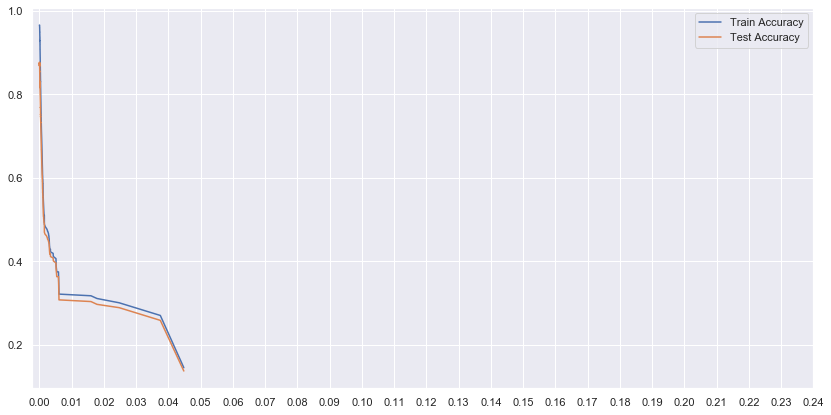

In [30]:
# Checking best pruning value to prevent overfitting
import matplotlib.pyplot as plt

accuracy_train,accuracy_test=[],[]

for i in alphas:
    clf1=DecisionTreeClassifier(ccp_alpha=i)
    
    clf1.fit(X_train, y_train)
    y_train_pred=clf1.predict(X_train)
    y_test_pred=clf1.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))


sns.set()
plt.rcParams["figure.figsize"] = (14, 7)
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()
    

* From the graph above, we can see that the train vs test are not overfitted to a statistically significant extent as at each interval of ccp_alpha we do not see a large difference in accuracy.

In [31]:
#imports for k-fold
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### K-fold with DT

In [32]:
kfold = StratifiedKFold(n_splits=10)
acc = cross_validate(DecisionTreeClassifier(criterion='gini'), X_train, y_train, cv=kfold, scoring = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score, average = 'macro'),
       'recall' : make_scorer(recall_score, average = 'macro'), 
       'f1_score' : make_scorer(f1_score, average = 'macro')})
print(acc)

{'fit_time': array([0.04288483, 0.0428853 , 0.04487967, 0.04388332, 0.04487991,
       0.04288507, 0.041888  , 0.0428853 , 0.041888  , 0.04388189]), 'score_time': array([0.00498676, 0.00498676, 0.00498676, 0.00498629, 0.004987  ,
       0.00498629, 0.00598407, 0.00398922, 0.00498676, 0.00498724]), 'test_accuracy': array([0.8782138 , 0.86738836, 0.86738836, 0.8714479 , 0.87212449,
       0.86806495, 0.85520974, 0.86400541, 0.86797563, 0.8774543 ]), 'test_precision': array([0.87399969, 0.86071803, 0.86186082, 0.86689443, 0.86685977,
       0.86309481, 0.84870879, 0.85732212, 0.86219915, 0.87243329]), 'test_recall': array([0.87714358, 0.86624596, 0.86626567, 0.87035698, 0.87079763,
       0.86670311, 0.85388206, 0.86277492, 0.86684934, 0.87648396]), 'test_f1_score': array([0.87386039, 0.8621194 , 0.86295847, 0.86719378, 0.86755452,
       0.86325358, 0.84995941, 0.85833739, 0.86313876, 0.87334072])}


In [33]:
print('Test Accuracy Mean:', acc['test_accuracy'].mean())
print('Test Precision Mean:', acc['test_precision'].mean())
print('Test Recall Mean:', acc['test_recall'].mean())
print('Test F1-score Mean:', acc['test_f1_score'].mean())

Test Accuracy Mean: 0.8689272956647851
Test Precision Mean: 0.8634090907293956
Test Recall Mean: 0.8677503199533536
Test F1-score Mean: 0.864171641797282


In [34]:
print('Test Accuracy Std:', acc['test_accuracy'].std())
print('Test Precision Std:', acc['test_precision'].std())
print('Test Recall Std:', acc['test_recall'].std())
print('Test F1-score Std:', acc['test_f1_score'].std())

Test Accuracy Std: 0.006279384132580369
Test Precision Std: 0.006942646809310387
Test Recall Std: 0.006356487626271779
Test F1-score Std: 0.006649363282309797


### K-fold using Gridsearch 

In [35]:
#k-fold using gridsearch
parameters = {'max_depth':range(3,30)}
clf2 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf2.fit(X_train,y_train)
tree_model = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

0.8606033442549382 {'max_depth': 26}


* As the data training and testing is not very overfitted, there is not much difference in the testing accuracy using k-fold cross validation.

### DT with criterion='entropy', random_state=42

In [36]:
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf3.fit(X_train, y_train)
print('\n')
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf3.predict(X_train)))
print('\n')
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf3.predict(X_test)))
print('\n')
print(classification_report(y_true=y_test, y_pred=clf3.predict(X_test)))



Accuracy Score on train data:  0.9662335904723237


Accuracy Score on the test data:  0.8709153643190582


              precision    recall  f1-score   support

         3.0       0.97      1.00      0.99       690
         4.0       0.89      0.96      0.93       699
         5.0       0.77      0.71      0.74       722
         6.0       0.74      0.62      0.67       707
         7.0       0.79      0.84      0.81       721
         8.0       0.91      0.98      0.95       712
         9.0       1.00      1.00      1.00       676

    accuracy                           0.87      4927
   macro avg       0.87      0.87      0.87      4927
weighted avg       0.87      0.87      0.87      4927



### DT with criterion=gini, random_state=42

In [37]:
clf4 = DecisionTreeClassifier(criterion='gini',random_state=42).fit(X_train, y_train)
#plt.figure(figsize=(20,20))
#plot_tree(clf1, filled=True)
#plt.show()

In [38]:
# Metrics for clf4
print('\n')
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf4.predict(X_train)))
print('\n')
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf4.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_test, y_pred=clf4.predict(X_test)))



Accuracy Score on train data:  0.9662335904723237


Accuracy Score on the test data:  0.8719301806373047


Classification report: 

              precision    recall  f1-score   support

         3.0       0.97      1.00      0.98       690
         4.0       0.90      0.96      0.93       699
         5.0       0.77      0.70      0.74       722
         6.0       0.75      0.62      0.68       707
         7.0       0.78      0.85      0.81       721
         8.0       0.92      0.98      0.95       712
         9.0       1.00      1.00      1.00       676

    accuracy                           0.87      4927
   macro avg       0.87      0.87      0.87      4927
weighted avg       0.87      0.87      0.87      4927



* When comparing between gini and entropy, we can see that it does not affect the model accuracy much pre-pruning. 87.4% vs 87.5% accuracy, respectively. This suggests that it might be better to use gini as it requires less processing power.

## Tests for overfitting of data

### DT with criterion='gini', random_state=42 and ccp_alpha=0.005

In [39]:
clf5 = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=0.005).fit(X_train, y_train)
print('\n')
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf5.predict(X_train)))
print('\n')
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf5.predict(X_test)))
print(classification_report(y_true=y_test, y_pred=clf5.predict(X_test)))



Accuracy Score on train data:  0.41155772093652726


Accuracy Score on the test data:  0.40105540897097625
              precision    recall  f1-score   support

         3.0       0.44      0.85      0.58       690
         4.0       0.00      0.00      0.00       699
         5.0       0.30      0.27      0.28       722
         6.0       0.27      0.05      0.08       707
         7.0       0.19      0.05      0.08       721
         8.0       0.24      0.63      0.34       712
         9.0       0.96      1.00      0.98       676

    accuracy                           0.40      4927
   macro avg       0.34      0.41      0.33      4927
weighted avg       0.34      0.40      0.33      4927



C:\Users\adlan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adlan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adlan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* At ccp_alpha of 0.005 using the criterion of gini, we can see that train accuracy is at 41% and test accuracy at 39.8%, this suggests that the data is not overfitted. However, it has pruned the nodes which have a quality of 4, thus giving no results for quality 4 wines.

### DT with criterion='entropy', random_state=42 and ccp_alpha=0.005

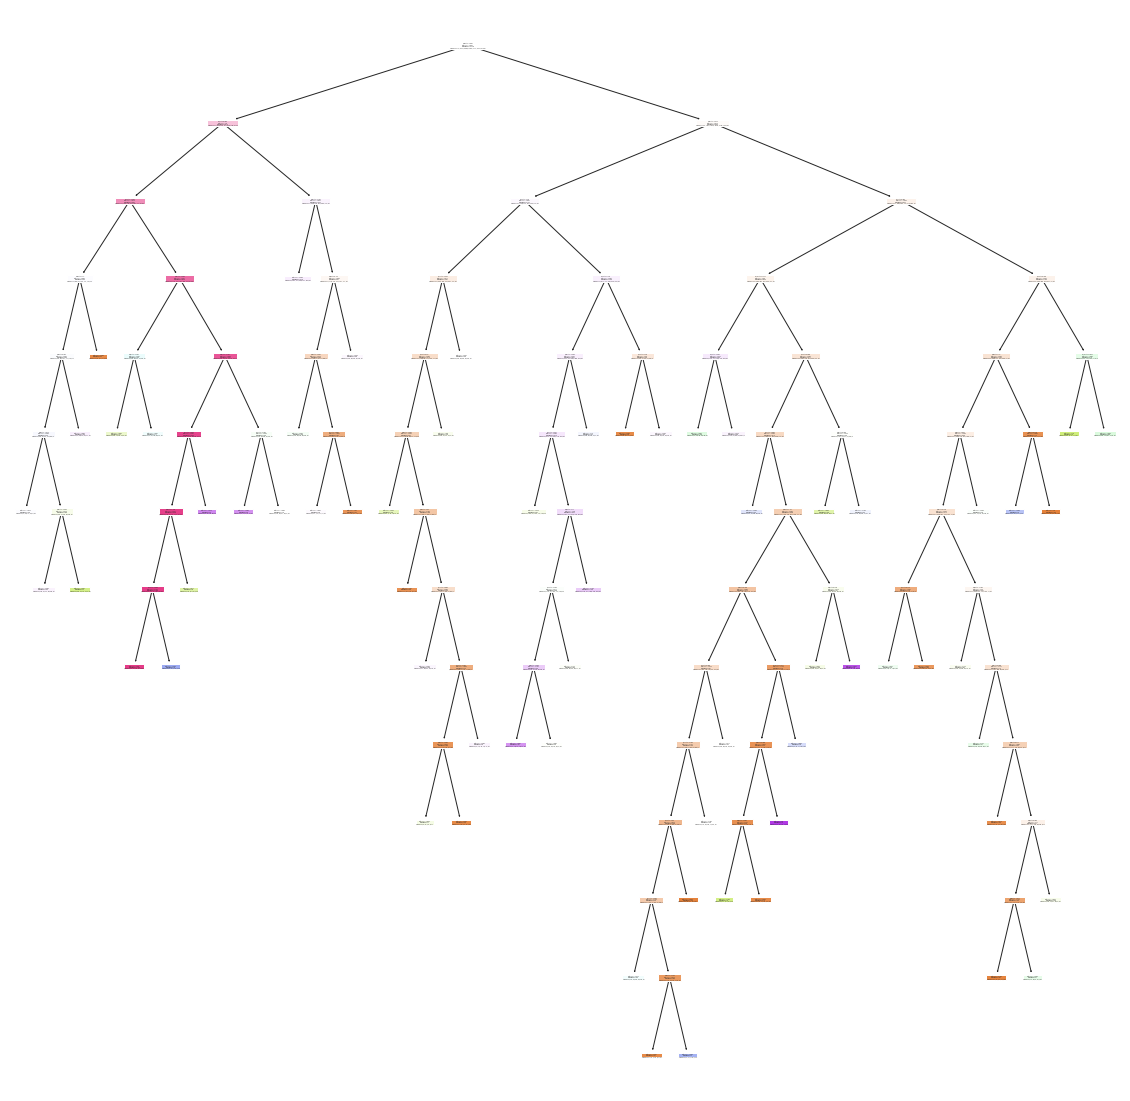

In [40]:
clf6 = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=0.005).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(clf6, filled=True)
plt.show()

In [41]:
# Metrics for clf3
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf6.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf6.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_test, y_pred=clf6.predict(X_test)))

Accuracy Score on train data:  0.5254432264176478
Accuracy Score on the test data:  0.5092348284960422


Classification report: 

              precision    recall  f1-score   support

         3.0       0.90      1.00      0.95       690
         4.0       0.35      0.42      0.39       699
         5.0       0.32      0.23      0.27       722
         6.0       0.27      0.06      0.10       707
         7.0       0.31      0.18      0.23       721
         8.0       0.33      0.71      0.45       712
         9.0       0.99      1.00      1.00       676

    accuracy                           0.51      4927
   macro avg       0.50      0.52      0.48      4927
weighted avg       0.49      0.51      0.48      4927



* After changing the criterion to entropy, we can see that the results are relatively better at the same ccp_alpha level. This suggests that the calculation of entropy is better at predicting the model after pruning the nodes.

### Random Forest

Random Forest is an ensemble model that use en ensemble of tree classifiers. RF use voting between many trained trees to get accurate predictions.

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)

In [44]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=rf.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=rf.predict(X_test)))
print('\n')
print('Classification report: \n')
print(classification_report(y_true=y_test, y_pred=rf.predict(X_test)))

Accuracy Score on train data:  0.9662335904723237
Accuracy Score on the test data:  0.8857316825654556


Classification report: 

              precision    recall  f1-score   support

         3.0       0.98      1.00      0.99       690
         4.0       0.93      0.96      0.95       699
         5.0       0.80      0.71      0.75       722
         6.0       0.73      0.70      0.72       707
         7.0       0.80      0.85      0.83       721
         8.0       0.95      0.98      0.97       712
         9.0       1.00      1.00      1.00       676

    accuracy                           0.89      4927
   macro avg       0.88      0.89      0.89      4927
weighted avg       0.88      0.89      0.88      4927



### Features importance

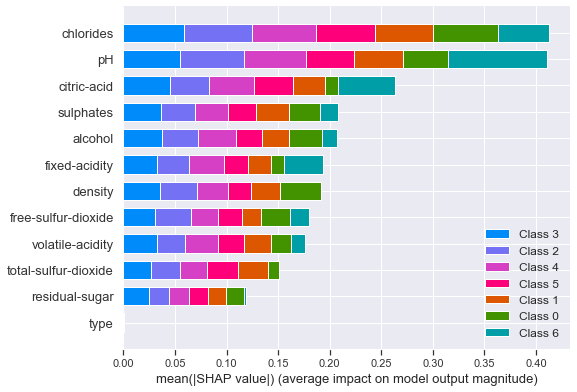

In [45]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

* Using a default Decision Tree Classifier with gini, the most contributing factors for predicting the wine quality would be the ph and the chlorides which accounts for 0.4 average impact on model output.

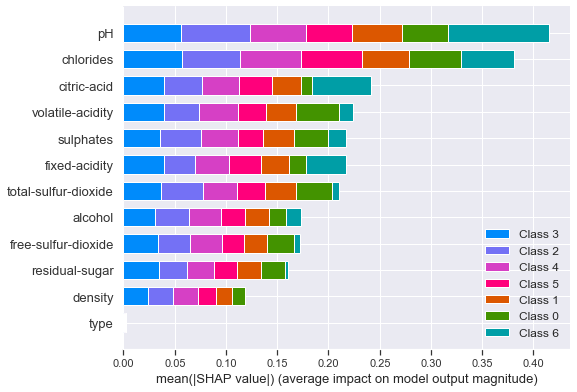

In [46]:
import shap
explainer = shap.TreeExplainer(clf3)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

* When using Entropy on our Decision Tree Classifier, the ph is slightly more favoured than the chloride, however both these factors are still the largest contributing factors to Wine Quality. 
* It also calculated 0 impact from total-sulfur-dioxide, residual-sugar and volatile-acidity.

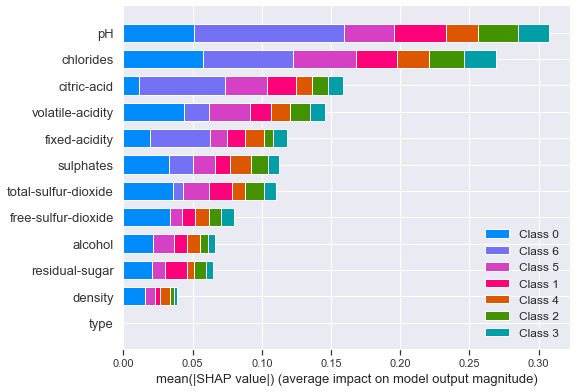

In [47]:
import shap
explainer = shap.TreeExplainer(clf6)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

* After pruning with entropy, the explanatory variables remained similar as before.

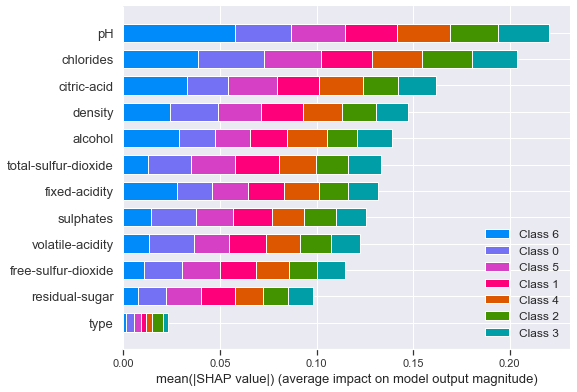

In [48]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

* After training with random forest, we see that type has some presence on quality of wine, however the magnitude of impact on the model is reduced for all factors. This suggests that there is some differences in the quality of wine based on whether it is red or white wine.

**DT with XGBoost**

In [49]:
!pip install xgboost
!pip install graphviz
!conda install graphviz
from sklearn import datasets
from sklearn import metrics
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('ggplot')


Solving environment: ...working... done

# All requested packages already installed.



In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [51]:
model_XGB = XGBClassifier().fit(X_train,y_train)
print(model_XGB)

expected_y  = y_test
predicted_y = model_XGB.predict(X_test)
print('\n')
print('Classification report: \n')
print(metrics.classification_report(expected_y, predicted_y))
print('\n')
print('Confusion matrix: \n')
print(metrics.confusion_matrix(expected_y, predicted_y))

[16:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Classification report: 

              precision    recall  f1-score   support

         3.0       0.98      1.00      0.99       690
         4.0       0.91      0.96      0.94       699
         5.0       0.75      0.67      0.71       722
         6.0       0.72      0.62      0.67       707
         7.0       0.75      0.83      0.79       721
         8.0       0

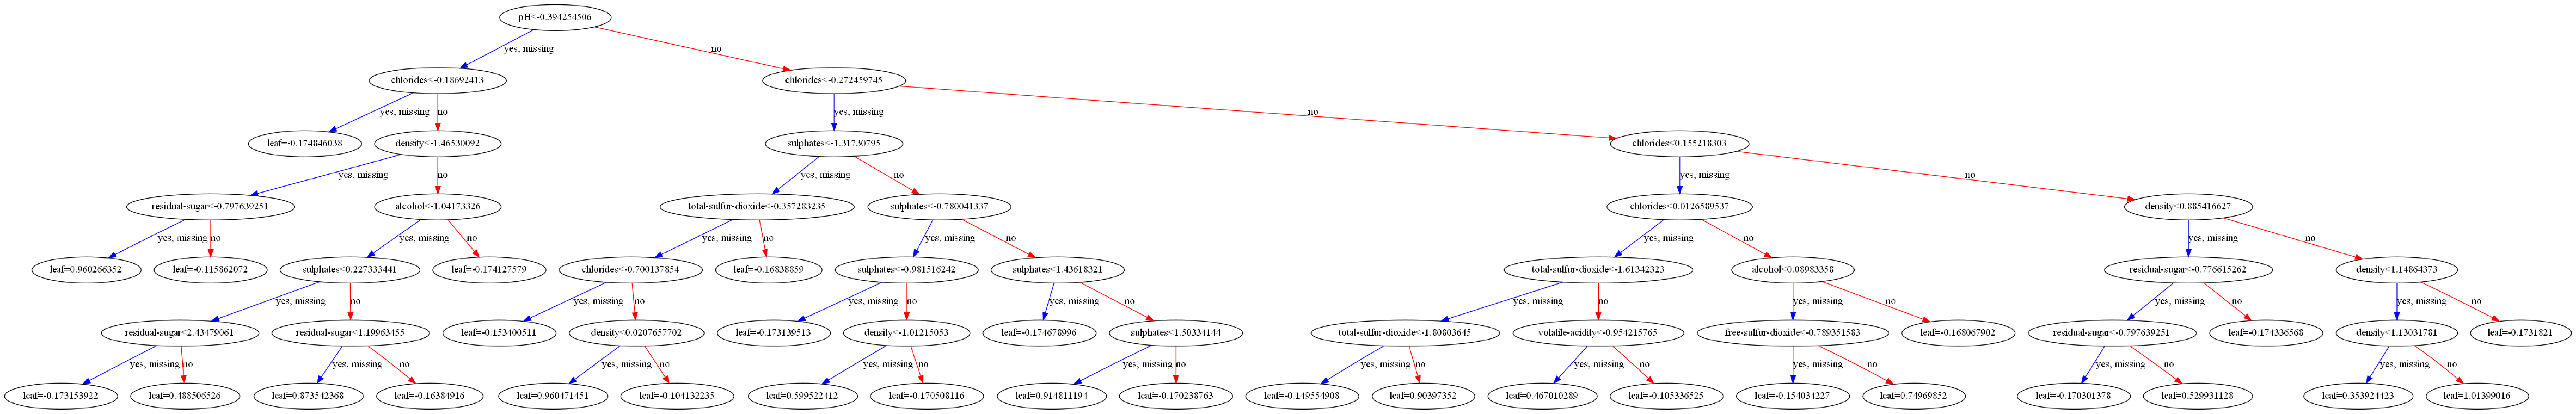

In [52]:
# Windows Graphviz Path
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz\bin'

plt.rcParams["figure.figsize"] = (200, 400)
plot_tree(model_XGB); plt.show()

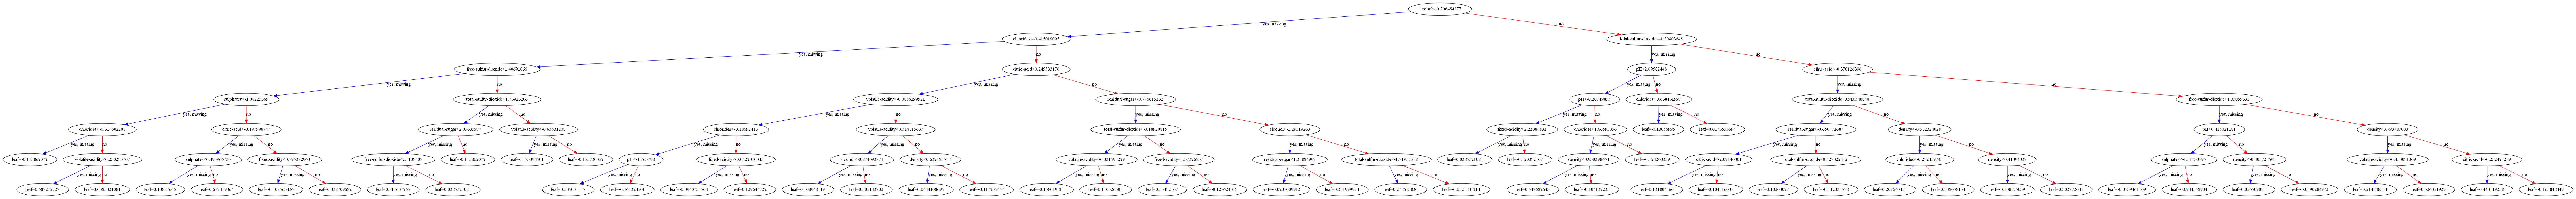

In [53]:
plt.rcParams["figure.figsize"] = (200, 400)
plot_tree(model_XGB, num_trees=4); plt.show()

In [54]:
plt.rcParams["figure.figsize"] = (200, 400)
plot_tree(model_XGB, num_trees=0, rankdir='LR'); plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


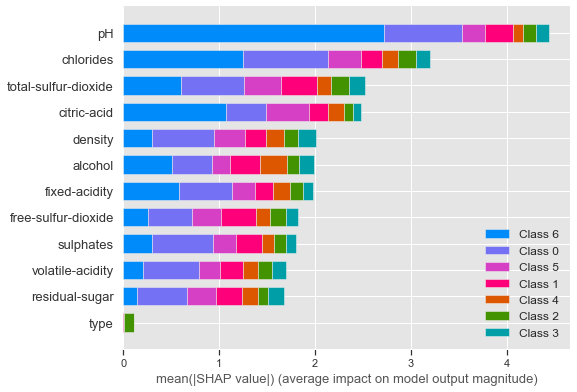

In [55]:
import shap
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Split red & white wine dataset to test for separate variables

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('newWine.csv')

In [ ]:
data.loc[data['type']>=1, "White"]="White"
data.loc[data['type']<1, "Red"]="Red"

In [ ]:
data.head()

In [ ]:
redW = data[(data['Red']=='Red')]

del redW['White']

redW.to_csv('redW.csv', index=False)

In [ ]:
whiteW = data[(data['White']=='White')]

del whiteW['Red']

whiteW.to_csv('whiteW.csv', index=False)

### Red & White wine test for values

In [ ]:
# Comment out as needed for red or white wine
#data = pd.read_csv('whiteW.csv')
data = pd.read_csv('redW.csv')

In [ ]:
X = data.loc[:, ~data.columns.isin(['quality', 'Quality', 'Red', 'type'])]

y = data['quality']
Y = data['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score on train data: \n')
print(classification_report(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('\n')
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('\n')
print('Classification report on test data:\n')
print(classification_report(y_true=y_test, y_pred=y_pred))

In [ ]:
kfold = StratifiedKFold(n_splits=10)
acc = cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=kfold, scoring = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score, average = 'macro'),
       'recall' : make_scorer(recall_score, average = 'macro'), 
       'f1_score' : make_scorer(f1_score, average = 'macro')})
print(acc)

In [ ]:
print('Test Accuracy Mean:', acc['test_accuracy'].mean())
print('Test Precision Mean:', acc['test_precision'].mean())
print('Test Recall Mean:', acc['test_recall'].mean())
print('Test F1-score Mean:', acc['test_f1_score'].mean())

In [ ]:
print('Test Accuracy Std:', acc['test_accuracy'].std())
print('Test Precision Std:', acc['test_precision'].std())
print('Test Recall Std:', acc['test_recall'].std())
print('Test F1-score Std:', acc['test_f1_score'].std())

In [ ]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")